In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/dogvscat/test/0/272.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/270.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/253.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/260.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/273.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/265.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/271.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/251.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/274.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/256.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/254.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/267.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/252.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/258.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/261.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/264.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/269.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/263.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/255.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/257.jpg
/kaggle/input/dog-vs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
import keras

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import numpy as np

from sklearn.metrics import accuracy_score

In [4]:
train_dir = '/kaggle/input/dog-vs-cat/dogvscat/train'
test_dir = '/kaggle/input/dog-vs-cat/dogvscat/test'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (224,224), batch_size = 20, class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 20, class_mode = 'binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Neural Network

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [9]:
from tensorflow.keras import optimizers
model.compile (loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-3), metrics = ['accuracy'])


In [19]:
history = model.fit_generator(train_generator,steps_per_epoch= train_generator.samples//20,epochs=10,validation_data = test_generator, validation_steps = test_generator.samples//20)

/tmp/ipykernel_32/1568845668.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch= train_generator.samples//20,epochs=10,validation_data = test_generator, validation_steps = test_generator.samples//20)


Epoch 1/10
25/25 [==============================] - 10s 387ms/step - loss: 0.1074 - accuracy: 0.9640 - val_loss: 1.5236 - val_accuracy: 0.6000
Epoch 2/10
25/25 [==============================] - 9s 368ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 2.3544 - val_accuracy: 0.6250
Epoch 3/10
25/25 [==============================] - 9s 377ms/step - loss: 6.4500e-04 - accuracy: 1.0000 - val_loss: 2.5098 - val_accuracy: 0.6500
Epoch 4/10
25/25 [==============================] - 9s 371ms/step - loss: 1.5627e-04 - accuracy: 1.0000 - val_loss: 3.2043 - val_accuracy: 0.5750
Epoch 5/10
25/25 [==============================] - 9s 372ms/step - loss: 6.0407e-05 - accuracy: 1.0000 - val_loss: 3.5136 - val_accuracy: 0.5750
Epoch 6/10
25/25 [==============================] - 9s 373ms/step - loss: 2.9404e-05 - accuracy: 1.0000 - val_loss: 4.0518 - val_accuracy: 0.5750
Epoch 7/10
25/25 [==============================] - 9s 376ms/step - loss: 1.5514e-05 - accuracy: 1.0000 - val_loss: 3.4284 - val_ac

In [21]:
model.save('cats_or_dogs.h5')

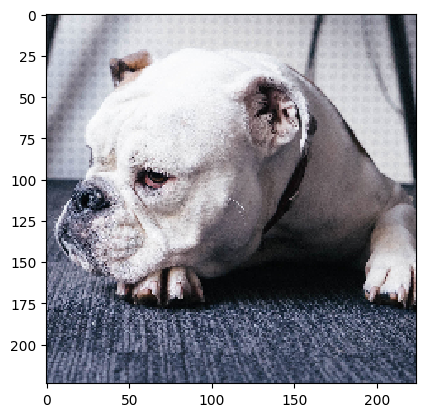

In [27]:
from tensorflow.keras.preprocessing import image
path = '/kaggle/input/dog-vs-cat/dogvscat/train/1/103.jpg'
image = image.load_img(path,target_size=(224,224))
plt.imshow(image, interpolation='nearest')
plt.show()

In [28]:
image_array = np.array(image)
image_array.shape

(224, 224, 3)

In [29]:
image_array = image_array.reshape(1,224,224,3)

In [30]:
predd = model.predict(image_array)
predd

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

In [31]:
predd = model.predict(image_array)
if predd==[[0]]:
    print("it's a cat!!!")
else:
    print("it's a dog!!!")
        

1/1 [==============================] - 0s 19ms/step
it's a dog!!!
